In [1]:
# importing pandas module for data preprocessing and  analysis
import pandas as pd

In [2]:
# loading required csv files or data
titanic = pd.read_csv('E:\\software\\files\\titanic\\gender_submission.csv')
train = pd.read_csv('E:\\software\\files\\titanic\\train.csv')
test = pd.read_csv('E:\\software\\files\\titanic\\test.csv')

In [3]:
train.info() # taking some info from data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [4]:
# showing maximun columns and rows inthe notebook

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [7]:
import seaborn as sns # importing seaborn for data visualisation

In [8]:
import matplotlib.pyplot as plt # matplotlib for data visualisation also

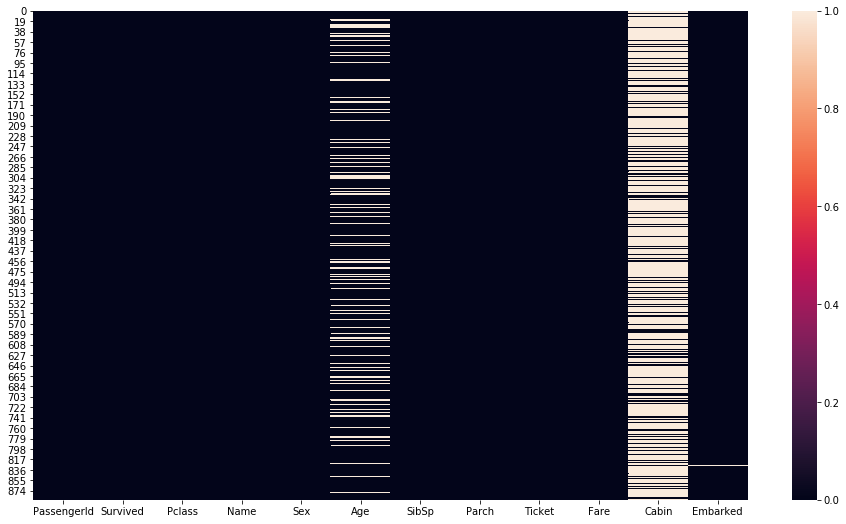

In [9]:
plt.figure(figsize=(16,9))   # to raise the figure size 
sns.heatmap(train.isnull()) # generating heat map 

In [10]:
train.isnull().sum()   #checking null values count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# calculating percentage of missing data
prec_var = train.isnull().sum() / train.shape[0] * 100
prec_var

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [12]:
# removing column having missing value more than 19%
null_var = prec_var[prec_var > 20].keys()
null_var
        
    

Index(['Cabin'], dtype='object')

In [13]:
drop_col = train.drop(columns= null_var) # dropped unnecessary data from columns or data missed columns

In [14]:
drop_col.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [15]:
drop_col['Age'] = drop_col['Age'].fillna(drop_col['Age'].mean()) #filling mean value to age 

In [16]:
drop_col.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
drop_row_clean = drop_col.dropna(axis= 0) # dropped rows having missed data

In [18]:
drop_row_clean.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

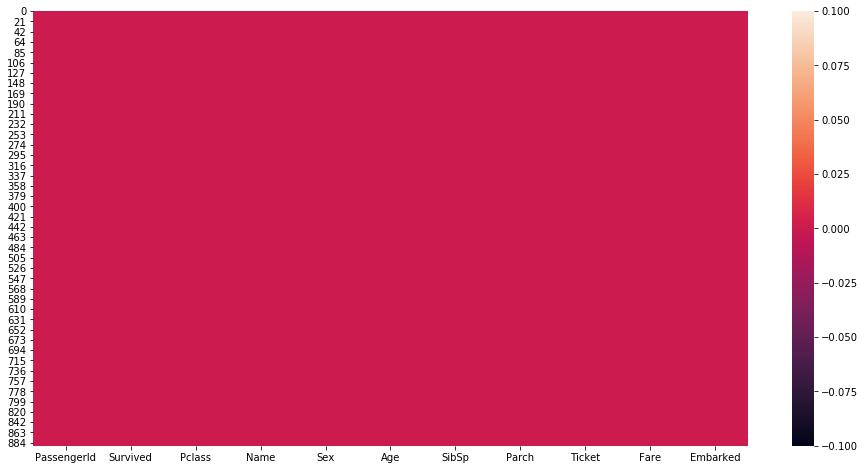

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(drop_row_clean.isnull())

In [20]:
cleaned_data = drop_row_clean.copy() # changed the variable name here by making copy of older data frame
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 69.5+ KB


In [21]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
# checking correlation 
# corr = cleaned_data.corr()
# corr['Survived'].sort_values(ascending=False)

In [23]:
from sklearn.preprocessing import LabelEncoder #encoding categorical variables
encoder = LabelEncoder()

In [24]:
# converting categorical data into integer values

attr = ['Sex','Embarked']
for attributes in attr:
    cleaned_data[attributes] = encoder.fit_transform(cleaned_data[attributes])
cleaned_data.head()

# cleaned_data['Embarked'] = encoder.fit_transform(cleaned_data['Embarked'])
# cleaned_data['Sex'] = encoder.fit_transform(cleaned_data['Sex'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [25]:
len(cleaned_data.columns)

11

In [26]:
cleaned_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [27]:
cleaned_data_int  = cleaned_data.drop(columns= cleaned_data.select_dtypes(include='object').columns, axis = 1) #dropped unwanted columns 

In [28]:
cleaned_data_int.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [29]:
# checking correlation
corr = cleaned_data_int.corr()
corr['Survived'].sort_values(ascending= False)

Survived       1.000000
Fare           0.255290
Parch          0.083151
PassengerId   -0.005028
SibSp         -0.034040
Age           -0.074673
Embarked      -0.169718
Pclass        -0.335549
Sex           -0.541585
Name: Survived, dtype: float64

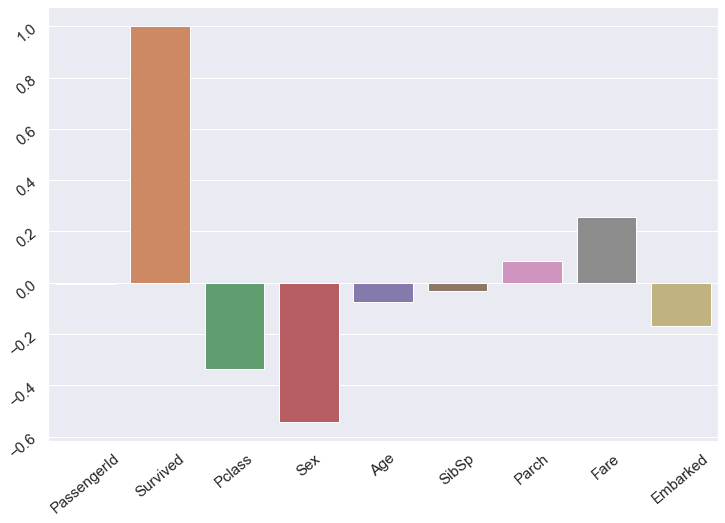

In [30]:
import seaborn as sns
plt.figure(figsize= (12,8))
sns.set()
ax = sns.barplot(cleaned_data_int.columns,cleaned_data_int.corrwith(cleaned_data_int['Survived']))
ax.tick_params(labelsize = 15, labelrotation = 40, color = 'k')

In [31]:
# splitting data into training and testing  or can say  feature and label

X = cleaned_data_int.drop(columns=['Survived','PassengerId'],axis = 1)
Y = cleaned_data_int.iloc[:,1:2]


In [32]:
# training and testing split using sklearn model selection train test split function 
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,
                                                 test_size = 0.2, 
                                                 random_state=0)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
364,3,1,29.699118,1,0,15.5000,1
256,1,0,29.699118,0,0,79.2000,0
477,3,1,29.000000,1,0,7.0458,2
272,2,0,41.000000,0,1,19.5000,2
554,3,0,22.000000,0,0,7.7750,2


In [33]:
from sklearn.preprocessing import StandardScaler  #normalising the data using standard scaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train)
x_test_sc = scale.transform(x_test)


# building model here

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np


# _______________________________________________________________
# Decision Tree model

modelD = DecisionTreeClassifier().fit(X_train_sc,Y_train)


In [42]:
y_pred = modelD.predict(x_test_sc)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
matrix = confusion_matrix(y_test, y_pred)


In [48]:
matrix

array([[89, 16],
       [27, 46]], dtype=int64)

In [49]:
score = accuracy_score(y_test, y_pred)
score

0.7584269662921348

In [50]:
cross_score = cross_val_score(modelD,X_train_sc,np.ravel(Y_train),cv=5)
cross_score.mean()


0.8073180340785975

KNneighborsClassifier 

In [51]:
# import numpy as np
# from sklearn.model_selection import cross_val_score
# knnscores = []
# for i in range(1,21):
#     Knn = KNeighborsClassifier(n_neighbors= i)
#     scores = cross_val_score(Knn ,X_train_sc,np.ravel(Y_train), cv = 5)
#     knnscores.append(scores.mean())


In [52]:
# max(knnscores)

NameError: name 'knnscores' is not defined

In [53]:
# plt.figure(figsize= (16,9))
# plt.plot([i for i in range(1,21)], knnscores ,color='green')
# for i in range(len(knnscores)):
#     plt.text(i,knnscores[i-1],(i, knnscores[i-1]))
    
# plt.xticks([i for i in range(1,21)])
# plt.xlabel('number of n_neigbors',fontdict={'fontsize': 25})
# plt.ylabel('accuracy',fontdict={'fontsize': 25})
# plt.title('Finding best Accuracy by ploting graph',fontdict={'fontsize': 25})


    

Random Forest

In [54]:
# MR = RandomForestClassifier(n_estimators=1000).fit(X_train_sc,np.ravel(Y_train))
# predict = MR.predict(x_test_sc)
# score = accuracy_score(y_test,predict)
# score

In [55]:
# import numpy as np
# from sklearn.model_selection import cross_val_score
# est = [100,200,400,500,700,900,1000]
# knnscores = []
# for i in est:
#     MRR = RandomForestClassifier(n_estimators=i)
#     scores = cross_val_score(MRR ,X_train_sc,np.ravel(Y_train), cv = 5)
#     knnscores.append(scores.mean())

In [59]:
# max(knnscores)

In [57]:
# plt.figure(figsize= (16,9))
# plt.plot([i for i in est], knnscores ,color='green',linestyle= '--')
# for i in range(len(knnscores)):
#     plt.text(i,knnscores[i-1],(i, knnscores[i-1]))
    
# plt.xticks([i for i in est])
# plt.xlabel('number of n_estimaters',fontdict={'fontsize': 25})
# plt.ylabel('accuracy',fontdict={'fontsize': 25})
# plt.title('Random Forest best Accuracy by ploting graph',fontdict={'fontsize': 25})


KNN

In [60]:
Knn = KNeighborsClassifier(n_neighbors=16)
Knn.fit(X_train_sc,np.ravel(Y_train))
y_kn_pred = Knn.predict(x_test_sc)
score = accuracy_score(y_test,y_kn_pred)
score

0.7528089887640449

In [62]:

# created a dataframe of accuracies with different models 
decision = {'train': [0.8073081847729735,0.8354575002462328,0.8269969467152565],'test':[0.7584269662921348,0.7528089887640449,0.7640449438202247]}

dataframe = pd.DataFrame(decision,index=['Decision','KNn','Random'])
dataframe

,train,test
Decision,0.807308,0.758427
KNn,0.835458,0.752809
Random,0.826997,0.764045


In [65]:

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
def clean_data(dataframe,encoder=encoder,scale=scale,X_train=X_train):
    prec_var = dataframe.isnull().sum() / dataframe.shape[0] * 100
#     print(prec_var)
    null_var = prec_var[prec_var > 25].keys()
    
    drop_col = dataframe.drop(columns= null_var,axis=1)
    drop_col['Age'] = drop_col['Age'].fillna(drop_col['Age'].mean())
    drop_row_clean = drop_col.dropna(axis= 0)
    cleaned_data = drop_row_clean.copy()
    
    attr = ['Sex','Embarked']
    for attributes in attr:
        cleaned_data[attributes] = encoder.fit_transform(cleaned_data[attributes])
        
    cleaned_data_int  = cleaned_data.drop(columns= cleaned_data.select_dtypes(include='object').columns, axis = 1)  
    
    Data = cleaned_data_int.drop(columns='PassengerId',axis = 1)

    
    return Data

    

    

    

In [97]:
X_test = clean_data(test)

In [98]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [99]:
test_sc = scale.transform(X_test)

In [114]:
Prediction = modelD.predict(test_sc)
len(Prediction)

417

In [117]:
len(test['PassengerId'][:418])
test['PassengerId'].head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [123]:
dataframe = {'passengerId':test['PassengerId'][:417],'survived':Prediction}
submission = pd.DataFrame(dataframe)
submission.head()

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [122]:
# submission = pd.concat(test['PassengerId'],predD)

In [124]:
submission.to_csv('submission.csv')

# dumping the model

In [126]:
import joblib
joblib.dump(modelD,'titanic_machine_learning_predictor')

['titanic_machine_learning_predictor']